<a href="https://colab.research.google.com/github/yasminemasmoudi/P2M/blob/master/Count_Vectorizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
!pip install nltk -q

Natural Language Toolkit (NLTK) library in a quiet mode. 

The -q flag suppresses the output during installation, making the installation process less verbose.

In [7]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
drive_path = '/content/drive/My Drive/p2mfiles/'
df_books = pd.read_csv(drive_path + 'books_desc.csv', index_col = 0)
full_genre = pd.read_csv(drive_path + 'final_genre.csv')

In [10]:
full_genre.head()

,Unnamed: 0,book_id,tag_id,count,genre
0,1,1,11305,37174,fantasy
1,5,1,11743,9954,fiction
2,25,1,7457,958,classics
3,38,1,22973,673,paranormal
4,52,1,20939,465,mystery


In [11]:
df_books.head()

,r_index,book_id,authors,original_title,image_url,average_rating,ratings_count,genre,desc
0,1,2767052,Suzanne Collins,The Hunger Games,https://images.gr-assets.com/books/1447303603l...,4.34,4780653,"fiction, fantasy","In a future North America, where the rulers of..."
1,2,3,"J.K. Rowling, Mary GrandPré",Harry Potter and the Philosopher's Stone,https://images.gr-assets.com/books/1474154022l...,4.44,4602479,"fantasy, fiction",Rescued from the outrageous neglect of his aun...
2,3,41865,Stephenie Meyer,Twilight,https://images.gr-assets.com/books/1361039443l...,3.57,3866839,"fantasy, fiction",With 160 million copies of the Twilight Saga s...
3,4,2657,Harper Lee,To Kill a Mockingbird,https://images.gr-assets.com/books/1361975680l...,4.25,3198671,"classics, fiction",The unforgettable novel of a childhood in a sl...
4,5,4671,F. Scott Fitzgerald,The Great Gatsby,https://images.gr-assets.com/books/1490528560l...,3.89,2683664,"classics, fiction",A young man newly rich tries to recapture the ...


In [12]:
cols = [c for c in full_genre.columns if 'Unnamed' not in c]
full_genre = full_genre[cols]
full_genre.head()

,book_id,tag_id,count,genre
0,1,11305,37174,fantasy
1,1,11743,9954,fiction
2,1,7457,958,classics
3,1,22973,673,paranormal
4,1,20939,465,mystery


In [13]:
genres = ['art','biography','business','Christian','Comics','Contemporary','Cookbooks','Crime',
          'Fantasy','Fiction','History','Horror','Manga','Memoir','Mystery','Nonfiction',
          'Paranormal','Philosophy','Poetry','Psychology','Religion','Science','Suspense',
          'Spirituality','Sports','Thriller','Travel','Classics']

In [14]:
len(df_books)

9274

In [15]:
for genre in genres:
  count = sum(df_books.genre.str.contains(genre.lower()))
  print(f'Count for {genre} is {count}')

Count for art is 95
Count for biography is 258
Count for business is 143
Count for Christian is 159
Count for Comics is 261
Count for Contemporary is 1166
Count for Cookbooks is 53
Count for Crime is 162
Count for Fantasy is 2292
Count for Fiction is 6476
Count for History is 534
Count for Horror is 388
Count for Manga is 100
Count for Memoir is 295
Count for Mystery is 1131
Count for Nonfiction is 904
Count for Paranormal is 579
Count for Philosophy is 190
Count for Poetry is 120
Count for Psychology is 160
Count for Religion is 118
Count for Science is 184
Count for Suspense is 42
Count for Spirituality is 70
Count for Sports is 48
Count for Thriller is 478
Count for Travel is 50
Count for Classics is 1199


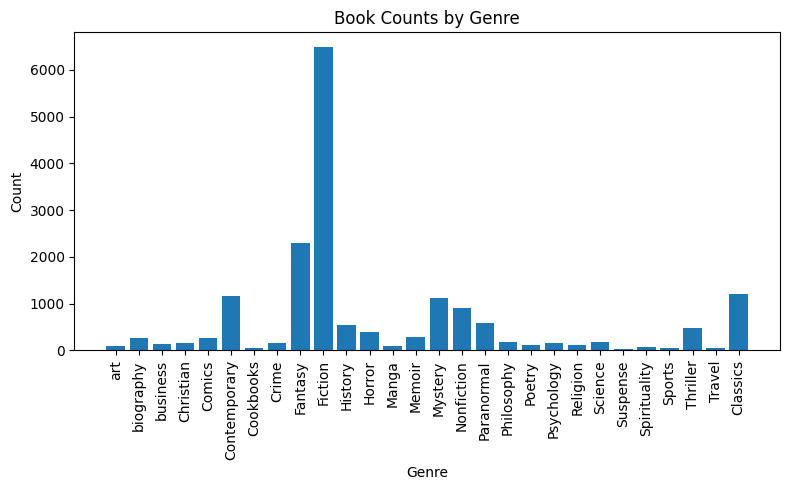

In [18]:
import matplotlib.pyplot as plt
import numpy as np

counts = []
for genre in genres:
    count = sum(df_books.genre.str.contains(genre.lower()))
    counts.append(count)

# Plotting the counts
x = np.arange(len(genres))
plt.figure(figsize=(8, 5))
plt.bar(x, counts)
plt.xticks(x, genres, rotation='vertical')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Book Counts by Genre')
plt.tight_layout()
plt.show()


In [19]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9274 entries, 0 to 9273
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   r_index         9274 non-null   int64  
 1   book_id         9274 non-null   int64  
 2   authors         9274 non-null   object 
 3   original_title  9274 non-null   object 
 4   image_url       9274 non-null   object 
 5   average_rating  9274 non-null   float64
 6   ratings_count   9274 non-null   int64  
 7   genre           9274 non-null   object 
 8   desc            9274 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 724.5+ KB


In [20]:
np.sum(df_books.isna())

r_index           0
book_id           0
authors           0
original_title    0
image_url         0
average_rating    0
ratings_count     0
genre             0
desc              0
dtype: int64

In [21]:
def _removeNonAscii(s):
    return "".join(i for i in s if  ord(i)<128)

def make_lower_case(text):
    return text.lower()

def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

In [22]:
def preproc(col):
    col = _removeNonAscii(col)
    col = make_lower_case(col)
    col = remove_stop_words(col)
    col = remove_punctuation(col)
    return col

In [23]:
features = ['authors','original_title','average_rating', 'desc']
df_filledbooks = df_books[features].copy(deep = True)
df_filledbooks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9274 entries, 0 to 9273
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   authors         9274 non-null   object 
 1   original_title  9274 non-null   object 
 2   average_rating  9274 non-null   float64
 3   desc            9274 non-null   object 
dtypes: float64(1), object(3)
memory usage: 362.3+ KB


In [24]:
for feature in ['authors','original_title', 'desc']:
    df_filledbooks[feature] = df_filledbooks[feature].apply(preproc)

,authors,original_title,average_rating,desc
0,suzanne collins,hunger games,4.34,future north america rulers panem maintain con...
1,j k rowling mary grandpr,harry potter philosopher s stone,4.44,rescued outrageous neglect aunt uncle young bo...
2,stephenie meyer,twilight,3.57,160 million copies twilight saga sold worldwid...
3,harper lee,kill mockingbird,4.25,unforgettable novel childhood sleepy southern ...
4,f scott fitzgerald,great gatsby,3.89,young man newly rich tries recapture past win ...


In [25]:
df_filledbooks.head()

,authors,original_title,average_rating,desc
0,suzanne collins,hunger games,4.34,future north america rulers panem maintain con...
1,j k rowling mary grandpr,harry potter philosopher s stone,4.44,rescued outrageous neglect aunt uncle young bo...
2,stephenie meyer,twilight,3.57,160 million copies twilight saga sold worldwid...
3,harper lee,kill mockingbird,4.25,unforgettable novel childhood sleepy southern ...
4,f scott fitzgerald,great gatsby,3.89,young man newly rich tries recapture past win ...


In [29]:
def create(x):
    return x['original_title'] + ' ' + x['authors'] + ' ' + str(x['average_rating']) + ' ' + x['desc']

In [30]:
df_filledbooks['create'] = df_filledbooks.apply(create, axis = 1)

In [31]:
df_filledbooks["create"]

0       hunger games suzanne collins 4.34 future north...
1       harry potter philosopher s stone j k rowling m...
2       twilight stephenie meyer 3.57 160 million copi...
3       kill mockingbird harper lee 4.25 unforgettable...
4       great gatsby f scott fitzgerald 3.89 young man...
                              ...                        
9269    bayou moon ilona andrews 4.09 parents vanish c...
9270    means ascent robert a caro 4.25 traces johnson...
9271    mauritius command patrick o brian 4.35 napoleo...
9272    cinderella ate daughter dispatches frontlines ...
9273    first world war john keegan 4.0 history great ...
Name: create, Length: 9274, dtype: object

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer(stop_words = 'english')
# m by n matrix
tf_matrix = tfidf.fit_transform(df_filledbooks['create'])

cosine_sim2 = cosine_similarity(tf_matrix, tf_matrix)

In [33]:
tf_matrix.data.nbytes + tf_matrix.indptr.nbytes + tf_matrix.indices.nbytes

3321548

In [34]:
cosine_sim2.nbytes

688056608

In [35]:
from scipy import sparse
sparse.save_npz("tfmatrix.npz", tf_matrix)

In [36]:
%%time
sims = []
for i in range(tf_matrix.shape[0]):
    sims.append(cosine_similarity(tf_matrix[0], tf_matrix[i]).squeeze())

CPU times: user 9.02 s, sys: 0 ns, total: 9.02 s
Wall time: 9.09 s


In [37]:
list(enumerate(sims))

[(0, array(1.)),
 (1, array(0.01133558)),
 (2, array(0.01571155)),
 (3, array(0.01530745)),
 (4, array(0.01495996)),
 (5, array(0.)),
 (6, array(0.)),
 (7, array(0.01463168)),
 (8, array(0.)),
 (9, array(0.0126042)),
 (10, array(0.)),
 (11, array(0.01817172)),
 (12, array(0.00684294)),
 (13, array(0.)),
 (14, array(0.)),
 (15, array(0.0080142)),
 (16, array(0.23355327)),
 (17, array(0.)),
 (18, array(0.02921039)),
 (19, array(0.2616438)),
 (20, array(0.01791082)),
 (21, array(0.02156244)),
 (22, array(0.)),
 (23, array(0.04508773)),
 (24, array(0.01799869)),
 (25, array(0.00866991)),
 (26, array(0.01202243)),
 (27, array(0.)),
 (28, array(0.)),
 (29, array(0.)),
 (30, array(0.)),
 (31, array(0.)),
 (32, array(0.)),
 (33, array(0.020168)),
 (34, array(0.)),
 (35, array(0.)),
 (36, array(0.)),
 (37, array(0.)),
 (38, array(0.)),
 (39, array(0.)),
 (40, array(0.)),
 (41, array(0.)),
 (42, array(0.01285024)),
 (43, array(0.)),
 (44, array(0.01635012)),
 (45, array(0.)),
 (46, array(0.01060

In [38]:
list(enumerate(cosine_sim2[0]))

[(0, 0.9999999999999999),
 (1, 0.011335583409111756),
 (2, 0.015711550529477508),
 (3, 0.01530744858952975),
 (4, 0.014959955259175775),
 (5, 0.0),
 (6, 0.0),
 (7, 0.014631677676384116),
 (8, 0.0),
 (9, 0.012604195550144628),
 (10, 0.0),
 (11, 0.01817171958676473),
 (12, 0.006842939394038217),
 (13, 0.0),
 (14, 0.0),
 (15, 0.008014203625226356),
 (16, 0.2335532654022442),
 (17, 0.0),
 (18, 0.029210388978405784),
 (19, 0.2616438001752267),
 (20, 0.01791081678777571),
 (21, 0.021562436327127246),
 (22, 0.0),
 (23, 0.04508772752122769),
 (24, 0.01799868899179314),
 (25, 0.00866990679801362),
 (26, 0.012022426849446243),
 (27, 0.0),
 (28, 0.0),
 (29, 0.0),
 (30, 0.0),
 (31, 0.0),
 (32, 0.0),
 (33, 0.020168001395617054),
 (34, 0.0),
 (35, 0.0),
 (36, 0.0),
 (37, 0.0),
 (38, 0.0),
 (39, 0.0),
 (40, 0.0),
 (41, 0.0),
 (42, 0.012850235506519118),
 (43, 0.0),
 (44, 0.016350119961580784),
 (45, 0.0),
 (46, 0.010607285505806297),
 (47, 0.0),
 (48, 0.0),
 (49, 0.01706145436713756),
 (50, 0.0219367

In [39]:
sims

[array(1.),
 array(0.01133558),
 array(0.01571155),
 array(0.01530745),
 array(0.01495996),
 array(0.),
 array(0.),
 array(0.01463168),
 array(0.),
 array(0.0126042),
 array(0.),
 array(0.01817172),
 array(0.00684294),
 array(0.),
 array(0.),
 array(0.0080142),
 array(0.23355327),
 array(0.),
 array(0.02921039),
 array(0.2616438),
 array(0.01791082),
 array(0.02156244),
 array(0.),
 array(0.04508773),
 array(0.01799869),
 array(0.00866991),
 array(0.01202243),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.020168),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.01285024),
 array(0.),
 array(0.01635012),
 array(0.),
 array(0.01060729),
 array(0.),
 array(0.),
 array(0.01706145),
 array(0.02193677),
 array(0.),
 array(0.02113959),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.01104613),
 array(0.01403202),
 array(0.),
 array(0.),
 array(0.0281942),
 array(0.),
 array(0.04666566),
 array

In [40]:
df_filledbooks = df_filledbooks.reset_index()
indices = pd.Series(data = df_filledbooks.index, index = df_filledbooks['original_title'])

In [41]:
def get_recommendations_new(title, cosine_sim = cosine_sim2):
    title = preproc(title)
#   Get indice of given book
    idx = indices[title]
    
    # Get this books sim with all other books, enum to keep track of book index
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    # Except the book itself
    sim_scores = sim_scores[1:11]
    
    movie_indices  = [i[0] for i in sim_scores]
    
    return list(df_books['original_title'].iloc[movie_indices])

In [42]:
r = get_recommendations_new("To Kill a Mockingbird")
print(r)

['Go Set a Watchman', 'Mockingbird', 'Kill Shot', 'Never Go Back ', 'A Time to Kill', 'Kill Me If You Can', 'The Wright Brothers', 'The Appeal', 'Saving June', 'Grave Secret (Harper Connelly, #4)']


In [43]:
a = tf_matrix

In [44]:
from scipy import sparse
a = sparse.csr_matrix(cosine_sim2)

In [45]:
a.data.nbytes + a.indptr.nbytes + a.indices.nbytes

219482480

In [46]:
np.savez_compressed('/content/drive/MyDrive/p2mfiles/cosin_rating_sim.npz', array1=cosine_sim2)